In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
from PIL import Image

In [3]:
from time import time
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mapin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mapin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import os

if not os.path.exists("mineração_texto"):
    os.mkdir("mineração_texto")

- Importação da base

In [5]:
df_relatos = pd.read_csv('C:\\Users\\mapin\\Documents\\crimes_selecionados_pará.csv')


C:\Users\mapin\AppData\Local\Temp\ipykernel_22372\21599524.py:1: DtypeWarning: Columns (2,4,9,11,13,14,15,16,20,21,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_relatos = pd.read_csv('C:\\Users\\mapin\\Documents\\crimes_selecionados_pará.csv')


### Pré-processamento e limpeza dos dados

In [6]:
total_palavras = df_relatos['relato'].apply(lambda x: len(x.split())).sum()

print(f'Total de palavras no DataFrame: {total_palavras}')

Total de palavras no DataFrame: 80908761


In [7]:
relatos=df_relatos[['relato']]

In [8]:
relatos.shape

(429478, 1)

In [9]:
pd.set_option('display.max_colwidth', None)

In [10]:
relatos.head(5)

,relato
0,"<p>A relatora vem a esta Seccional comunicar que seu filho Sr. EDSON GUSTAVO SANTOS DIAS, residente na PASS. SANTA MARIA, Nº 30, ATALAIA, a esta agredi verbalmente e&nbsp;fisicamente. Que usa palavras ofensivas para agredir a relatora e que no dia e hora supramencionada jogou um vidro de detergente no rosto da relatora, que tenta expulsar a relatora de sua propria residencia. Registra para os devidos fins de direito e pede providencias.///////////////////////////////</p>"
1,"<p>A nacional acima qualificado compareceu nesta Seccional de Polícia no dia e hora ao norte mencionado, para relatar que foi vítima de agressão física, praticado pelas suas irmãs de nome MILIANE BORGES DA SILVA E JAILA BORGES DA SILVA, residente e domiciliada TV salmo 91, assentamento bom jesus, n° 10, Marituba/Pa, alega a declarante que tudo começou devido a sua irmã esta lhe acusando de subtrair um valor de R$ 100,00 Reais, quando a declarante pegou um pal para bater na sua irmã JAILA&nbsp;a outra supracitada puxou o Pal&nbsp;e bateu na cabeça da depoente;QUE, Miliane veio começou a puxar o seu cabelo a na hora do fato a inda mencionou que vai lhe pegar, Registra-se//////////////////</p>"
2,"<p>A cidadã acima qualificada comparece nesta Delegacia com propósito de comunicar que manteve relacionamento em regime de união estável com o senhor DEYVID PATRICK DA SILVA, isto pelo período de quatro anos, obtendo desta união um filho, atualmente com sete anos. E que após o término do relacionamento, o senhor Patrick vem contribuindo com a importância de R$ 200,00 mensal, para o sustento da criança. E que a guarda e responsabilidade na criação do filho de ambos, ficou sob a responsabilidade da relatora, pois o senhor Deyvid saiu do estado para morar em Santa Catarina, isto com um outra mulher. Ocorre que neste mês de julho, o mesmo retornou de Santa Catarina, e solicitou ver seu filho e passar um final de semana com a criança. O que foi prontamente atendido, ficando acordado que Deyvid buscaria a criança e deixaria na residência onde vive, ou seja, na casa da relatora. Porém no dia de hoje, a relatora ao telefonar para o pai de Deyvid, para lhe informar acerca de uma medição da criança, então após isso a atual companheira de Deyvid veio a enviar diversas mensagens via Whatsapp, informando que Deyvid não iriar tratar assuntos relacionados ao filho de ambos mais, e que era ela a pessoa que iria resolver tudo. E que tal situação deixou a relatora constrangida e chateada, pois os assuntos referentes ao seu filho e de Deyvid deveriam sim, ser resolvidos por ambos, e não pela companheira do mesmo. Tendo ao final pedido para a citada pessoa de nome Sabrina, não enviar mais mensagens, pois não iria tratar com ela, tais assuntos. Registra o presente para os devidos fins de direito.</p><p><br></p><p><br></p>"
3,"<p>O policial militar acima identificado apresenta: SANDRO GONÇALVES DA SILVA, NASCIDA EM 20/08/81, CPTS 41192, o qual agrediu fisicamente sua ex-companheira GRACILENE MENDES CORREA, nascida em 14/01/76, motivado por vingança. O apresentado foi encontrado em sua residencia e não esboçou reação////</p>"
4,"<p>/////A relatora compareceu a esta delegacia de Medicilândia, no dia e hora supracitados,para informar que sua nora, RAINARA MACIANO COSTA, saiu de casa levando seu bebê de 9 meses, porém deixou mais 3 crianças de 4 anos, 5 anos e 6 anos. A relatora ficou com a criança de 6 anos e a avó materna ficou com as crianças de 4 e 5 anos. A crianças que ficaram, encontram-se em bom estado de saúde segundo a relatora.&nbsp; Registre-se./////</p>"


## Normalização de textos
### Transformação de texto
Funções auxiliares


- Remoção de stopwords
- Tokenização
- Lemmatização

In [ ]:
import string
from tqdm import tqdm

nlp = spacy.load("pt_core_news_sm", disable=["parser", "ner"])
stopwords_pt = set(stopwords.words("portuguese")).union({
   'relatora', 'qualificada', 'seccional', 'dpc','civil','militar','tomou', 'relator',
    'fica', 'fim', 'ato', 'desde', 'pois', 'abadessa', 'abaetetuba', 
    'abaetetuba abaetetuba', 'abaetetuba contatos', 'abaixa', 'abaixada', 
    'abaixado', 'abaixar', 'abaixar som', 'abaixar volume', 'abaixasse', 
    'abaixasse som', 'abaixo', 'abaixo assinado', 'abaixo elencadas', 
    'abaixo informacoes', 'abaixo olho', 'abaixo proibicao', 'abaixo proibição', 
    'abaixou', 'abaixou pegar', 'abaixou vidro', 'relatora', 'policial', 
    'militar', 'jurunas', 'silva', 'vtr', 'ciop', 'santos', 'bairro', 
    'fato', 'via', 'havia', 'guarnicao', 'relator', 'sido', 'policia', 
    'sgt', 'rua', 'nacional', 'seccional', 'icoaraci', 'urbana', 
    'seccional urbana', 'local', 'fato', 'silva', 'carlos', 'comunicar', 
    'bairro', 'sacramenta', 'rua', 'qualificada seccional', 'marambaia', 
    'passagem', 'momento', 'relatante', 'cpf', 'vou', 'textuais', 'vai', 
    'maria', 'vem', 'sra', 'depoente', 'relata', 'jose', 'apos', 
    'nacional', 'local', 'celular', 'iria', 'relator', 'declarante', 
    'declarado', 'policiais', 'guarnição', 'souza', 'antonio', 'paulo', 
    'santos', 'vou', 'textuais', 'qualificada', 'comparece', 'seguinte', 
    'comunicante', 'comunica', 'mencionados', 'comunica delegacia', 
    'virtual mencionados', 'belem', 'vitima', 'serao anexadas', 'pra', 
    'fazer', 'nesta', 'fins', 'data', 'informar', 'informa', 'mesma', 
    'onde', 'data', 'nao', 'informa', 'volta', 'mesma', 'tambem', 
    'entao', 'comecou', 'ate', 'nao', 'nbsp', 'nbsp nbsp', 'disse', 
    'outeiro', 'belém', 'fabio', 'aludido', 'fdata nascimento', 'fdata', 
    'nascimento mae', 'acima qualificado', 'compareceu', 'nesta', 
    "sendo", "ter", "hoje", "tal", "nome", "valor", "anos", "familiares", 
    "deseja", "idade", "nascida", "nascimento", "gmail", "ocorreu crime", 
    "porem", "hora", "acima", "dia hora", "relato", "conforme", 
    "virtual", "qualificado", "acima qualificado", "ficou", "porque", 
    "falou", "frente", "endereco", "ocorrencia", "boletim", 
    "boletim ocorrencia", "outro", "outra", "outros", "outras",
    "certo", "certa", "certos", "certas",
    "algum", "alguma", "alguns", "algumas",  "qualquer", "quaisquer",
    "mesmo", "mesma", "mesmos", "mesmas",
    "tipo", "coisa", "ponto", "parte",
    "vez", "voz", "lugar", "nome", "assim", "então", "apenas", "também",
    "só", "somente", "talvez", "afinal",   "fazer", "ter", "haver", "poder",
    "dar", "dizer", "ver", "saber",  "brasil", "paulo", "rio", "cidade",
    "são", "estado", "rua", "avenida",
    "centro", "bairro", "lago", "praça", "pessoa", "gente", "homem", "mulher",
    "tempo", "dia", "ano", "momento", "marco", "souza", "nazaré", "batista campos", "pedreira", "são brás", 
    "cremação", "marambaia", "são braz", "jurunas", "condor", "canudos", 
    "guamá", "maracangalha", "sacarreira", "umarizal", "val de cães", 
    "marco da légua", "são francisco", "campina", "comércio", "fátima", 
    "telegrafo", "montese", "susan", "curió", "tenoné", "são clemente", 
    "aurá", "entroncamento", "benguí", "castanheira", "agulha", "coqueiro", 
    "cruzeiro", "souza franco", "marahu", "são joão", "jaderlândia", "paraíso",   "itupiranga", "jacareacanga", "jacundá", "juruti", "limoeiro do ajuru", 
    "mãe do rio", "magalhães barata", "marabá", "maracanã", "marapanim", 
    "marituba", "medicilândia", "melgaço", "mocajuba", "moju", "monte alegre", 
    "muirapinima", "nova esperança do piria", "nova ipixuna", "novo progresso", 
    "novo repartimento", "óbitos", "oeiras do pará", "oriximiná", "ourém", 
    "ourilândia do norte", "pacajá", "palestina do pará", "paragominas", 
    "parauapebas", "pau d'arco", "peixe-boi", "piçarra", "placas", 
    "ponta de pedras", "portel", "porto de moz", "prainha", "primavera", 
    "quatipuru", "redenção", "rio maria", "rondon do pará", "ruropólis", 
    "salinópolis", "salvaterra", "santa bárbara do pará", "santa cruz do arari", 
    "santa izabel do pará", "santa luzia do pará", "santa maria das barreiras", 
    "santa maria do pará", "santana do araguaia", "santarém", "santarém novo", 
    "santo antônio do tauá", "são caetano de odivelas", "são domingos do araguaia", 
    "são domingos do capim", "são felix do xingu", "são francisco do pará", 
    "são geraldo do araguaia", "são joão da ponta", "são joão de pirabas", 
    "são joão do araguaia", "são miguel do guamá", "são sebastião da boa vista", 
    "sapucaia", "senador josé porfírio", "soure", "tailândia", "terra alta", 
    "terra santa", "tomé-açu", "tracuateua", "trairão", "tucumã", "tucuruí", "ulianópolis", "uruará", "vigia", "viseu", "vitória do xingu", "xinguara",  "abaetetuba", "abel figueiredo", "acará", "afuá", "altamira", 
    "anajás", "ananindeua", "anapu", "augusto corrêa", "aurora do pará", 
    "aveiro", "bagre", "baião", "bannach", "barcarena", "belém", 
    "belterra", "benevides", "bom jesus do tocantins", "bonito", 
    "bragança", "brasil novo", "brejo grande do araguaia", "breu branco", 
    "bujaru", "cachoeira do arari", "cachoeira do piriá", "cametá", 
    "canaã dos carajás", "capanema", "capitão poço", "castanhal", 
    "chaves", "colares", "conceição do araguaia", "concórdia do pará", 
    "cumaru do norte", "curionópolis", "curralinho", "curuá", "curuçá", 
    "dom eliseu", "eldorado dos carajás", "farol", "floresta do araguaia", 
    "garrafão do norte", "goianésia do pará", "gurupá", "igarapé-açu", 
    "igarapé-miri", "inhangapi", "ipixuna do pará", "irituia", "itaituba", 
    "boletim", "ocorrencia", "ocorrência", "registro", "numero", "número", "nº", "processo",
    "auto", "termo", "tipo", "data", "hora", "local", "relato", "historico", "histórico",
    "assinatura", "delegacia", "delegado", "escrivão", "escritura", "requerente", "requerido",
    "envolvido", "parte", "testemunha", "vitima", "vítima", "autor", "autoria", "suspeito",
    "compareceu", "declarou", "informou", "relatou", "afirmou", "disse", "comunicou",
    "solicitou", "requereu", "adicionou", "constou", "narrou", "descreveu", "acusou",
    "presenciou", "percebeu", "notou", "verificou", "constatou", "procedeu", "realizou",
    "conforme", "consoante", "artigo", "lei", "paragrafo", "inciso", "alínea", "código",
    "penal", "civil", "administrativo", "fls", "folha", "fl", "documento", "anexo",
    "certidão", "laudo", "prova", "material", "procedimento", "inquérito", "diligencia",
    "diligência", "instaurado", "instauração", "termo", "circunstância", "fato", "fatos",
    "via", "publica", "pública", "logradouro", "endereço", "endereco", "proximidade",
    "localidade", "área", "zona", "região", "ponto", "trecho", "km", "metro", "margem",
    "referencia", "referência", "coordenada", "altura", "altura do número", "borda",
    "data", "dia", "mês", "mes", "ano", "horário", "periodo", "período", "momento",
    "ocasião", "turno", "madrugada", "manhã", "manha", "tarde", "noite", "instante",
    "objeto", "veículo", "veiculo", "arma", "instrumento", "aparelho", "equipamento",
    "pertence", "pertencente", "propriedade", "valor", "quantia", "montante", "dano",
    "prejuízo", "prejuizo", "material", "materialidade", "produto", "produto", "item",
     "visto", "vista", "mesmo", "mesma", "neste", "deste", "daquele", "quando", "como",
    "onde", "após", "apos", "através", "atraves", "conforme", "segundo", "consoante",
    "entre", "sobre", "sob", "trás", "tras", "quanto", "quando", "quem", "qual", "quais"
})


In [ ]:
def clean_text(text):
    """Limpeza unificada do texto"""
    text = str(text).lower()
    patterns = [
        (r'\b[A-ZÀ-Ú]{2,}(?:\s+[A-ZÀ-Ú]{2,})+\b', ''),  
        (r'\w*\d\w*', ' '),  
        (r'\d+', ' '),      
        (r'<[^>]+>', ''),    
        (r'[{}]'.format(re.escape(string.punctuation)), ' '), 
        (r'[^\w\s]', ' ')   
    ]
    for pattern, repl in patterns:
        text = re.sub(pattern, repl, text)
    return re.sub(r'\s+', ' ', text).strip()

In [16]:
relatos["texto_limpo"] = relatos["relato"].apply(clean_text)

C:\Users\mapin\AppData\Local\Temp\ipykernel_22372\3004554542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relatos["texto_limpo"] = relatos["relato"].apply(clean_text)


In [17]:
def remove_stopwords_bruto(texto):
    if isinstance(texto, str):
        palavras = texto.lower().split()
        palavras_filtradas = [palavra for palavra in palavras if palavra not in stopwords_pt]
        return " ".join(palavras_filtradas)
    return texto  

In [18]:
relatos["texto_sem_stopwords"] = relatos["texto_limpo"].apply(remove_stopwords_bruto)

C:\Users\mapin\AppData\Local\Temp\ipykernel_22372\4275949917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relatos["texto_sem_stopwords"] = relatos["texto_limpo"].apply(remove_stopwords_bruto)


In [ ]:
def process_text(text):
    doc = nlp(text)
    return [
        token.lemma_.lower() for token in doc
        if not token.is_punct  
        and len(token.lemma_) > 2  # Filtra palavras muito curtas
    ]

In [20]:
relatos["tokens"] = relatos["texto_sem_stopwords"].apply(lambda x: process_text(x))

C:\Users\mapin\AppData\Local\Temp\ipykernel_22372\1423834218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relatos["tokens"] = relatos["texto_sem_stopwords"].apply(lambda x: process_text(x))


In [21]:
relatos

,relato,texto_limpo,texto_sem_stopwords,tokens
0,"<p>A relatora vem a esta Seccional comunicar que seu filho Sr. EDSON GUSTAVO SANTOS DIAS, residente na PASS. SANTA MARIA, Nº 30, ATALAIA, a esta agredi verbalmente e&nbsp;fisicamente. Que usa palavras ofensivas para agredir a relatora e que no dia e hora supramencionada jogou um vidro de detergente no rosto da relatora, que tenta expulsar a relatora de sua propria residencia. Registra para os devidos fins de direito e pede providencias.///////////////////////////////</p>",a relatora vem a esta seccional comunicar que seu filho sr edson gustavo santos dias residente na pass santa maria nº atalaia a esta agredi verbalmente e nbsp fisicamente que usa palavras ofensivas para agredir a relatora e que no dia e hora supramencionada jogou um vidro de detergente no rosto da relatora que tenta expulsar a relatora de sua propria residencia registra para os devidos fins de direito e pede providencias,filho sr edson gustavo dias residente pass santa atalaia agredi verbalmente fisicamente usa palavras ofensivas agredir supramencionada jogou vidro detergente rosto tenta expulsar propria residencia registra devidos direito pede providencias,"[filho, edson, gustavo, dia, residente, pass, santo, atalaia, agredir, verbalmente, fisicamente, usar, palavra, ofensivo, agredir, supramencionada, jogar, vidro, detergente, rosto, tentar, expulsar, proprio, residencia, registro, devir, direito, pedir, providencia]"
1,"<p>A nacional acima qualificado compareceu nesta Seccional de Polícia no dia e hora ao norte mencionado, para relatar que foi vítima de agressão física, praticado pelas suas irmãs de nome MILIANE BORGES DA SILVA E JAILA BORGES DA SILVA, residente e domiciliada TV salmo 91, assentamento bom jesus, n° 10, Marituba/Pa, alega a declarante que tudo começou devido a sua irmã esta lhe acusando de subtrair um valor de R$ 100,00 Reais, quando a declarante pegou um pal para bater na sua irmã JAILA&nbsp;a outra supracitada puxou o Pal&nbsp;e bateu na cabeça da depoente;QUE, Miliane veio começou a puxar o seu cabelo a na hora do fato a inda mencionou que vai lhe pegar, Registra-se//////////////////</p>",a nacional acima qualificado compareceu nesta seccional de polícia no dia e hora ao norte mencionado para relatar que foi vítima de agressão física praticado pelas suas irmãs de nome miliane borges da silva e jaila borges da silva residente e domiciliada tv salmo assentamento bom jesus n marituba pa alega a declarante que tudo começou devido a sua irmã esta lhe acusando de subtrair um valor de r reais quando a declarante pegou um pal para bater na sua irmã jaila nbsp a outra supracitada puxou o pal nbsp e bateu na cabeça da depoente que miliane veio começou a puxar o seu cabelo a na hora do fato a inda mencionou que vai lhe pegar registra se,polícia norte mencionado relatar agressão física praticado irmãs miliane borges jaila borges residente domiciliada tv salmo assentamento bom jesus n pa alega tudo começou devido irmã acusando subtrair r reais pegou pal bater irmã jaila supracitada puxou pal bateu cabeça miliane veio começou puxar cabelo inda mencionou pegar registra,"[polícia, norte, mencionar, relatar, agressão, físico, praticar, irmã, miliane, borges, jaila, borg, residente, domiciliar, salmo, assentamento, bom, jesus, alegar, tudo, começar, devido, irmã, acusar, subtrair, real, pegar, pal, bater, irmã, jaila, supracitar, puxar, pal, bater, cabeça, miliane, vir, começar, puxar, cabelo, inda, mencionar, pegar, registrar]"
2,"<p>A cidadã acima qualificada comparece nesta Delegacia com propósito de comunicar que manteve relacionamento em regime de união estável com o senhor DEYVID PATRICK DA SILVA, isto pelo período de quatro anos, obtendo desta união um filho, atualmente com sete anos. E que após o término do relacionamento, o senhor Patrick vem contribuindo com a importância de R$ 200,00 mensal, para o sustento da criança. E que a guarda e responsabilidade na criação do filho de ambos, ficou sob a r

In [ ]:
print(f"Total de relatos: {len(relatos)}")
print("\nExemplo de tokens:")
print(relatos["tokens"].head(3))

tokens_por_relato = relatos["tokens"].apply(len)
print(f"\nMédia de tokens por relato: {tokens_por_relato.mean():.1f}")
print(f"Relato com mais tokens: {tokens_por_relato.max()}")
print(f"Relato com menos tokens: {tokens_por_relato.min()}")

Total de relatos: 429478

Exemplo de tokens:
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         [filho, edson, gustavo, dia, residente, pass, santo, atalaia, agredir, verbalmente, fisicamente, usar, palavra, ofensivo, agredir, supramencionada, jogar, vidro, detergente, rosto, tentar, expulsar, proprio, residencia, registro, devir, direito, pedir, providencia]
1                                                      

In [28]:
relatos.to_csv("C:\\Users\\mapin\\Documents\\relatos_processados.csv")

## **1. LDA: Modelo Estatístico de Tópicos**  
**Objetivo**:  
Estabelecer uma baseline comparativa com modelos mais avançados.  

**Hiperparâmetros Críticos**:  
- `num_topics`: Número de tópicos (ajustar com coerência).  
- `passes`: Número de iterações (mais = melhor qualidade, mas mais lento).  

In [4]:
relatos_processados = pd.read_csv("C:\\Users\\mapin\\Documents\\relatos_processados.csv")

In [ ]:
pd.set_option('display.max_colwidth', 30)  
pd.set_option('display.width', 1000) 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 20) 

In [80]:
relatos_processados.head(5)

,Unnamed: 0,relato,texto_limpo,texto_sem_stopwords,tokens
0,0,"<p>A relatora vem a esta Seccional comunicar que seu filho Sr. EDSON GUSTAVO SANTOS DIAS, residente na PASS. SANTA MARIA, Nº 30, ATALAIA, a esta agredi verbalmente e&nbsp;fisicamente. Que usa palavras ofensivas para agredir a relatora e que no dia e hora supramencionada jogou um vidro de deterge...",a relatora vem a esta seccional comunicar que seu filho sr edson gustavo santos dias residente na pass santa maria nº atalaia a esta agredi verbalmente e nbsp fisicamente que usa palavras ofensivas para agredir a relatora e que no dia e hora supramencionada jogou um vidro de detergente no rosto ...,"[filho, sr, edson, gustavo, dias, residente, pass, santa, atalaia, agredi, verbalmente, fisicamente, usa, palavras, ofensivas, agredir, supramencionada, jogou, vidro, detergente, rosto, tenta, expulsar, propria, residencia, registra, devidos, direito, pede, providencias]","[filho, edson, gustavo, dia, residente, pass, santo, atalaia, agredir, verbalmente, fisicamente, usar, palavra, ofensivo, agredir, supramencionada, jogar, vidro, detergente, rosto, tentar, expulsar, proprio, residencia, registro, devir, direito, pedir, providencia]"
1,1,"<p>A nacional acima qualificado compareceu nesta Seccional de Polícia no dia e hora ao norte mencionado, para relatar que foi vítima de agressão física, praticado pelas suas irmãs de nome MILIANE BORGES DA SILVA E JAILA BORGES DA SILVA, residente e domiciliada TV salmo 91, assentamento bom jesus...",a nacional acima qualificado compareceu nesta seccional de polícia no dia e hora ao norte mencionado para relatar que foi vítima de agressão física praticado pelas suas irmãs de nome miliane borges da silva e jaila borges da silva residente e domiciliada tv salmo assentamento bom jesus n maritub...,"[polícia, norte, mencionado, relatar, agressão, física, praticado, irmãs, miliane, borges, jaila, borges, residente, domiciliada, tv, salmo, assentamento, bom, jesus, n, pa, alega, tudo, começou, devido, irmã, acusando, subtrair, r, reais, pegou, pal, bater, irmã, jaila, supracitada, puxou, pal,...","[polícia, norte, mencionar, relatar, agressão, físico, praticar, irmã, miliane, borges, jaila, borg, residente, domiciliar, salmo, assentamento, bom, jesus, alegar, tudo, começar, devido, irmã, acusar, subtrair, real, pegar, pal, bater, irmã, jaila, supracitar, puxar, pal, bater, cabeça, miliane..."
2,2,"<p>A cidadã acima qualificada comparece nesta Delegacia com propósito de comunicar que manteve relacionamento em regime de união estável com o senhor DEYVID PATRICK DA SILVA, isto pelo período de quatro anos, obtendo desta união um filho, atualmente com sete anos. E que após o término do relacio...",a cidadã acima qualificada comparece nesta delegacia com propósito de comunicar que manteve relacionamento em regime de união estável com o senhor deyvid patrick da silva isto pelo período de quatro anos obtendo desta união um filho atualmente com sete anos e que após o término do relacionamento...,"[cidadã, propósito, manteve, relacionamento, regime, união, estável, senhor, deyvid, patrick, quatro, obtendo, desta, união, filho, atualmente, sete, término, relacionamento, senhor, patrick, contribuindo, importância, r, mensal, sustento, criança, guarda, responsabilidade, criação, filho, ambos...","[cidadã, propósito, manter, relacionamento, regime, união, estável, senhor, deyvid, patrickr, quatro, obter, de este, união, filho, atualmente, sete, término, relacionamento, senhor, patrickr, contribuir, importância, mensal, sustento, criança, guardar, responsabilidade, criação, filho, ambos, r..."
3,3,"<p>O policial militar acima identificado apresenta: SANDRO GONÇALVES DA SILVA, NASCIDA EM 20/08/81, CPTS 41192, o qual agrediu fisicamente sua ex-companheira GRACILENE MENDES CORREA, nascida em 14/01/76, motivado por vingança. O apresentado foi encontrado em sua residencia e não esboçou reação//...",o policial militar acima identificado apresenta sandro gonçalves da 

In [ ]:
from ast import literal_eval

try:
    relatos_processados['tokens'] = relatos_processados['tokens'].apply(literal_eval)
except:
    relatos_processados['tokens'] = relatos_processados['tokens'].str.split()

print(f"Tipo depois: {type(relatos_processados['tokens'].iloc[0])}")  # Agora deve ser <class 'list'>

Tipo depois: <class 'list'>


In [ ]:
from ast import literal_eval

try:
    relatos_processados['texto_sem_stopwords'] = relatos_processados['texto_sem_stopwords'].apply(literal_eval)
except:
    relatos_processados['texto_sem_stopwords'] = relatos_processados['texto_sem_stopwords'].str.split()

print(f"Tipo depois: {type(relatos_processados['texto_sem_stopwords'].iloc[0])}")  # Agora deve ser <class 'list'>

Tipo depois: <class 'list'>


#### Processo de vetorização
- Extração de Caracteríosticas (Bag of Words)

- Count Vectorizer (Tipo contagem)


In [8]:
relatos_prontos = [' '.join(tokens) for tokens in relatos_processados]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(
    min_df=400,           # Considera palavras que aparecem em pelo menos 2% documentos
    max_df=0.6,          # Exclui termos que aparecem em mais de 60% dos documentos
    max_features=8000,  # Limita o número de termos no vocabulário aos 50.000 mais frequentes
    #stop_words=list(stopwords_pt) # Remove palavras comuns que não são úteis
    ngram_range=(1, 2)   # Considera uni-gramas (termos únicos) e bi-gramas (pares de termos)
)

#Transformação
vec_text = tf_vectorizer.fit_transform(relatos_processados['tokens'].apply(lambda x: ' '.join(x)))

words = tf_vectorizer.get_feature_names_out()

print(vec_text.shape)
print(len(words))

(429478, 8000)
8000


In [69]:
words[0:20]

array(['2e', '2e forma', 'abalar', 'abalar emocionalmente',
       'abalar psicologicamente', 'abalo', 'abandonado', 'abandonar',
       'abandonar lar', 'abandono', 'abandono lar', 'abel',
       'abertasbarba', 'abertasbarba raspadacor', 'abordagem', 'abordar',
       'aborrecer', 'aborrecir', 'aborto', 'abracar'], dtype=object)

# Implementação do modelo LDA
Encontrar tópicos

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

In [14]:
def print_top_words(model, feature_names, n_top_words):
  #Essa função imprime as palavras mais importantes para cada tópico descoberto pelo modelo LDA.
  for topic_idx, topic in enumerate(model.components_):
    print("\n--\nTopic #{}: ".format(topic_idx + 1))
    message = ", ".join([feature_names[i]
                          for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)
  print()

def display_topics(W, H, feature_names, relatos, no_top_words, no_top_documents):
    #Essa função exibe os tópicos e os documentos mais representativos para cada tópico.
    for topic_idx, topic in enumerate(H):
        print("\n--\nTopic #{}: ".format(topic_idx + 1))
        print(", ".join([feature_names[i]
                for i in topic.argsort()[:-no_top_words - 1:-1]]).upper())
        top_d_idx = np.argsort(W[:,topic_idx])[::-1][0:no_top_documents]
        for d in top_d_idx:
            print('Relato índice {} : \t{:.2f}'.format(d, W[d, topic_idx]))

#### Modelo de Latent Dirichlet Allocation (LDA) com a biblioteca scikit-learn para realizar modelagem de tópicos no conjunto de relatos representados por vetores de contagem de palavras.

In [15]:
lda = LatentDirichletAllocation(n_components=20, 
                                learning_method='batch', # 'online' equivale a minibatch no k-means
                                random_state=0)

t0 = time()

lda.fit(vec_text)
doc_topic_matrix = lda.transform(vec_text) #Converte os documentos representados pelos vetores vec_text em distribuições de tópicos, onde cada linha da matriz resultante (doc_topic_matrix) representa um documento e cada coluna representa a probabilidade do documento pertencer a um determinado tópico.

print("done in %0.3fs." % (time() - t0))

done in 16159.733s.


* Palavras mais associadas com cada tópico

In [20]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)


Topics in LDA model:

--
Topic #1: 
filho, francisco, residente, medida, especializar, protetivo, medida protetivo, possuir, abrigo, casa

--
Topic #2: 
ameacar, ameaco, matar, morte, ameaca, afirmar, temer, casa, residencia, contra

--
Topic #3: 
filha, pequeno, escola, adolescente, sexual, pai, tutelar, mae, ocorrer, casa

--
Topic #4: 
casa, filho, ameaçar, companheiro, medida, protetivo, medida protetivo, contra, relacionamento, casal

--
Topic #5: 
domestico, violencia, luiz, violencia domestico, fernando, apresentar, familiar, contra, companheiro, luis

--
Topic #6: 
social, foto, rede, rede social, grupo, video, mensagem, whatsapp, facebook, imagem

--
Topic #7: 
mensagem, relacionamento, mandar, raimur, mandar mensagem, enviar, whatsapp, audio, aceitar, voce

--
Topic #8: 
ofender, proibicao, ofendir, agressor, determinar, contato, meio, limite, frequentar, fixar

--
Topic #9: 
apresentar, encontrar, cabivel, conduzir, unidade, acionar, hospital, devir, acusar, providencia

--

- Probabilidade de cada topico

In [22]:
topic_probabilities = doc_topic_matrix.mean(axis=0)
topic_percentages = topic_probabilities * 100

for topic_idx, percentage in enumerate(topic_percentages):
    print(f"Tópico {topic_idx + 1}: {percentage:.2f}%")


Tópico 1: 3.55%
Tópico 2: 5.75%
Tópico 3: 5.79%
Tópico 4: 3.64%
Tópico 5: 2.43%
Tópico 6: 4.37%
Tópico 7: 3.99%
Tópico 8: 3.12%
Tópico 9: 8.26%
Tópico 10: 2.00%
Tópico 11: 2.26%
Tópico 12: 7.36%
Tópico 13: 6.31%
Tópico 14: 5.71%
Tópico 15: 6.41%
Tópico 16: 6.35%
Tópico 17: 5.63%
Tópico 18: 8.36%
Tópico 19: 6.97%
Tópico 20: 1.73%


In [23]:
n_topics = lda.components_.shape[0]

dominant_topic_per_doc = np.argmax(doc_topic_matrix, axis=1)

topic_distribution = np.mean(doc_topic_matrix, axis=0)

for i, prob in enumerate(topic_distribution):
    print(f"Tópico {i + 1}: Probabilidade média = {prob:.3f} ({prob*100:.2f}%)")


Tópico 1: Probabilidade média = 0.035 (3.55%)
Tópico 2: Probabilidade média = 0.058 (5.75%)
Tópico 3: Probabilidade média = 0.058 (5.79%)
Tópico 4: Probabilidade média = 0.036 (3.64%)
Tópico 5: Probabilidade média = 0.024 (2.43%)
Tópico 6: Probabilidade média = 0.044 (4.37%)
Tópico 7: Probabilidade média = 0.040 (3.99%)
Tópico 8: Probabilidade média = 0.031 (3.12%)
Tópico 9: Probabilidade média = 0.083 (8.26%)
Tópico 10: Probabilidade média = 0.020 (2.00%)
Tópico 11: Probabilidade média = 0.023 (2.26%)
Tópico 12: Probabilidade média = 0.074 (7.36%)
Tópico 13: Probabilidade média = 0.063 (6.31%)
Tópico 14: Probabilidade média = 0.057 (5.71%)
Tópico 15: Probabilidade média = 0.064 (6.41%)
Tópico 16: Probabilidade média = 0.063 (6.35%)
Tópico 17: Probabilidade média = 0.056 (5.63%)
Tópico 18: Probabilidade média = 0.084 (8.36%)
Tópico 19: Probabilidade média = 0.070 (6.97%)
Tópico 20: Probabilidade média = 0.017 (1.73%)


* Documentos mais associados a cada topico

In [24]:
display_topics(doc_topic_matrix, lda.components_, tf_feature_names, relatos_processados, 10, 10)


--
Topic #1: 
FILHO, FRANCISCO, RESIDENTE, MEDIDA, ESPECIALIZAR, PROTETIVO, MEDIDA PROTETIVO, POSSUIR, ABRIGO, CASA
Relato índice 188278 : 	0.98
Relato índice 170873 : 	0.98
Relato índice 291755 : 	0.98
Relato índice 319845 : 	0.98
Relato índice 133475 : 	0.98
Relato índice 263161 : 	0.98
Relato índice 173199 : 	0.98
Relato índice 417066 : 	0.97
Relato índice 143240 : 	0.97
Relato índice 145232 : 	0.97

--
Topic #2: 
AMEACAR, AMEACO, MATAR, MORTE, AMEACA, AFIRMAR, TEMER, CASA, RESIDENCIA, CONTRA
Relato índice 422850 : 	0.98
Relato índice 254599 : 	0.98
Relato índice 322111 : 	0.97
Relato índice 149071 : 	0.97
Relato índice 232425 : 	0.97
Relato índice 364692 : 	0.97
Relato índice 244688 : 	0.97
Relato índice 232517 : 	0.97
Relato índice 394716 : 	0.97
Relato índice 270223 : 	0.97

--
Topic #3: 
FILHA, PEQUENO, ESCOLA, ADOLESCENTE, SEXUAL, PAI, TUTELAR, MAE, OCORRER, CASA
Relato índice 177609 : 	0.99
Relato índice 196170 : 	0.99
Relato índice 353871 : 	0.99
Relato índice 257135 : 	0.99

In [25]:
print('Matriz documento-tópicos:' + str(doc_topic_matrix.shape))
print('Matriz tópicos-termos:' + str(lda.components_.shape))

Matriz documento-tópicos:(429478, 20)
Matriz tópicos-termos:(20, 1034)


* Atribuir um tópico principal a cada documento com base nas distribuições de tópicos obtidas do modelo LDA.

In [28]:
main_topic = []
mt_prob = []
for l in range(len(relatos_processados['tokens'])):
  main_topic.append(doc_topic_matrix[l, :].argmax() + 1)
  mt_prob.append(doc_topic_matrix[l, :].max())

relatos = relatos_processados.assign(main_topic=main_topic, main_topic_prob=mt_prob)


In [32]:
topico = 1
pd.options.display.max_colwidth = 300
relatos[relatos['main_topic'] == topico].sort_values('main_topic_prob', ascending = False)[['main_topic_prob','tokens']].head(20).sample(10)

,main_topic_prob,tokens
133475,0.978409,"[procurar, especializar, denunciar, companheiro, ebson, pimentel, paraense, autonomo, filho, fatima, pimentel, residente, gentil, bitencourt, gentil, nove, janeiro, nazare, telefone, saber, conviver, possuir, filho, relacao, estao, separar, mês, ebson, querer, aceitar, termino, relacao, persegue..."
173199,0.975641,"[especializar, registrar, convive, mês, carmon, oliveira, ferreira, paraense, desempregado, identidade, filho, matilde, cordovil, oliveira, carmon, borges, ferreira, residente, relacionamento, casal, conturbar, carmon, ciumar, insulto, constantemente, tentar, agredi, ocasiao, horo, casa, passar,..."
322705,0.960417,"[investigador, quaificar, apresentar, dheimison, araujor, natural, filiacao, gilserlandio, lourenco, alberto, henrique, araujo, receita, federal, identidade, decima, oitar, ultima, travessa, belo, cep, contato, nascer, descumprer, medida, protetivo, urgencia, desfavor, taizo, conceicao, sousa, o..."
170873,0.982075,"[especializar, descumprimento, medida, protetivo, subir, praticar, companheiro, admir, ferreira, pinheiro, brasileiro, paraense, motorista, taxi, uber, ponte, estacionamento, supermercar, mix, atacarejo, mateus, roder, mario, covo, natural, macapa, filho, agostinho, belo, pinheiro, dor, ferreira..."
333066,0.964815,"[instauracao, flagrancial, vincular, bop, medida, protetivo, urgencia, indiciar, ediney, natural, filiacao, raimundo, edileuzo, barboso, identidade, pedro, alvar, cabral, almir, gabril, se ao, francisco, cep, contato, nascir, danielle, nayane, ramos, natural, filiacao, marta, carmo, ramos, nilo,..."
143240,0.971212,"[registrar, descumprimento, medida, protetivo, varer, ppor, companheiro, argemiro, orlar, melo, tavar, contato, residete, romulo, maiorano, atra, bosque, rodrigue, alves, companheiro, novamente, usar, terceiro, pedir, fizesse, acordo, reatar, relacao, declarar, aceito, casa, abrigo, manter, medi..."
186584,0.960417,"[especializar, denunciar, companheiro, wanzerlei, leite, ribeiro, brasileiro, paraense, natural, autonomo, filho, wanzerlei, ribeiro, delzuita, leite, ribeiro, residente, estrada, providenciar, alameda, junho, andar, telefone, atual, chamado, roseane, martins, telefone, saber, residir, enderenco..."
125057,0.956818,"[em esse, especializada, ter, tranquilidade, pertubar, ofender, verbalmente, companheiro, anderson, nazareno, alves, facunerys, separar, anderson, aceitar, relacionamento, persegue, ofender, pubica, safado, vagabunda, piranho, oferecer, abrigo, nescessario, relacao, medida, protetivo, manifestar..."
145232,0.970312,"[especializar, denunciar, companheiro, israel, residente, se ao, benedito, santa, jardim, florestal, icui, guajar, cep, relacionamento, abusivo, ira, retirar, lar, posteriormente, israel, chegar, alcoolizar, alterar, dizendo, procurar, dormir, aqui, dorme, procurar, direito, caralho, fudir, lasc..."
158652,0.950000,"[em esse, especializada, ameacar, ter, tranquilidade, pertubar, companheiro, maurison, douglas, costa, pinheiro, aceitar, relacionamento, persegue, oferecer, abrigo, nescessario, relacao, medida, protetivo, manifestar, depoimento, perante, autoridade, registre]"


* Tópicos por documento

In [33]:
# Nomes das colunas dos tópicos
topicnames = ["Topic {}".format(i + 1) for i in range(doc_topic_matrix.shape[1])]

# Criar DataFrame relato_topico
relato_topico = pd.DataFrame(np.round(doc_topic_matrix, 2), columns=topicnames, index=relatos.index)

# Adicionar o índice do relato ao DataFrame relato_topico
relato_topico['Relato_Index'] = relatos.index

# Reorganizar as colunas
ordem = ['Relato_Index']
ordem.extend(topicnames)
relato_topico = relato_topico[ordem]

# Visualizar o DataFrame relato_topico
relato_topico.head()



,Relato_Index,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.46,0.0,0.0,0.00,0.00,0.49,0.0,0.00,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.05,0.92,0.00,0.0,0.00,0.0
2,2,0.0,0.0,0.0,0.2,0.0,0.0,0.27,0.0,0.0,...,0.0,0.00,0.0,0.0,0.13,0.10,0.00,0.0,0.29,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.6,...,0.0,0.33,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.57,0.00,0.0,0.37,0.0


- #### Visualização modelo LDA

In [34]:
import pyLDAvis
import pyLDAvis.lda_model

pyLDAvis.enable_notebook()

ModuleNotFoundError: No module named 'pyLDAvis.lda_model'

* Função prepare para preparar os dados para visualização de tópicos utilizando o modelo LDA.

In [99]:
fig_width = 600
fig_height = 400

lda_vis = pyLDAvis.lda_model.prepare(lda, vec_text, tf_vectorizer, sort_topics=False, mds='tsne', R=10, n_jobs=1)

pyLDAvis.save_html(lda_vis, 'lda_vis.html')
pyLDAvis.display(lda_vis)

plt.figure(figsize=(fig_width, fig_height))


<Figure size 60000x40000 with 0 Axes>

Error in callback <function _draw_all_if_interactive at 0x0000022A0BAB1D80> (for post_execute), with arguments args (),kwargs {}:


MemoryError: bad allocation

<Figure size 60000x40000 with 0 Axes>

In [100]:
pyLDAvis.lda_model.prepare(lda, vec_text, tf_vectorizer, sort_topics=False, mds = 'tsne', R=10)

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

- Avaliação de coerencia dos topicos

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

texts_tokens = relatos_processados['tokens'].tolist()

dictionary = Dictionary(texts_tokens)
corpus = [dictionary.doc2bow(text) for text in texts_tokens]


In [ ]:

lda_topics = [
    [tf_feature_names[i] for i in topic.argsort()[:-11:-1]]
    for topic in lda.components_
]



In [ ]:

plt.figure(figsize=(8,5))
plt.plot(n_topics_range, coherence_values, marker='o')
plt.xlabel("Número de tópicos")
plt.ylabel("Coerência (NPMI)")
plt.title("Coerência por número de tópicos (LDA)")
plt.grid(True)
plt.show()


In [72]:
# Calcular coerência NPMI
coherence_model_lda = CoherenceModel(
    topics=lda_topics,
    texts=texts_tokens,
    dictionary=dictionary,
    coherence='c_npmi'   # Também pode testar com 'c_v' e 'u_mass'
)

coherence_lda = coherence_model_lda.get_coherence()
print(f"Coerência LDA (NPMI): {coherence_lda:.4f}")


Coerência LDA (NPMI): 0.1377


In [ ]:
perplexidade = lda_model.perplexity(X)
log_likelihood = lda_model.score(X)

print(f"Perplexidade do modelo: {perplexidade:.2f}")
print(f"Log Likelihood: {log_likelihood:.2f}")


#### Implementação PCA
- Reduzir a dimensionalidade do espaço de vetores

In [40]:
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans


In [41]:
pca = PCA()
X = pca.fit_transform(doc_topic_matrix)

In [42]:
pca.explained_variance_ratio_

array([1.02727556e-01, 7.92051098e-02, 7.68259906e-02, 7.32065569e-02,
       7.05831795e-02, 6.49296153e-02, 6.17306809e-02, 5.97251927e-02,
       5.47223364e-02, 5.30316945e-02, 5.14386818e-02, 4.70845118e-02,
       4.51146963e-02, 3.96752279e-02, 3.26615620e-02, 2.82767714e-02,
       2.42743488e-02, 2.20290799e-02, 1.27572073e-02, 1.47755471e-15])

Número de componentes para 95% da variância: 17


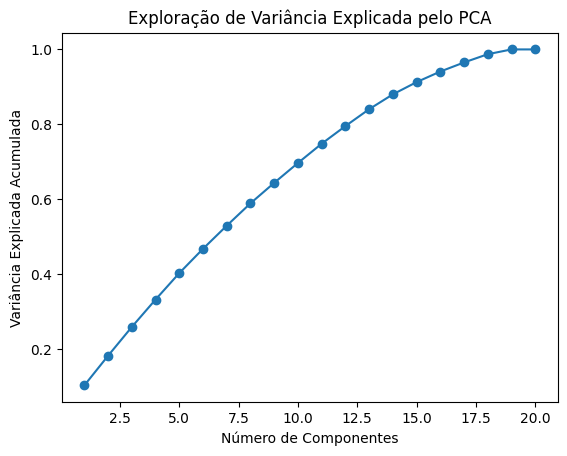

In [43]:
explained_variance_ratio = np.array([1.02727556e-01, 7.92051098e-02, 7.68259906e-02, 7.32065569e-02,
       7.05831795e-02, 6.49296153e-02, 6.17306809e-02, 5.97251927e-02,
       5.47223364e-02, 5.30316945e-02, 5.14386818e-02, 4.70845118e-02,
       4.51146963e-02, 3.96752279e-02, 3.26615620e-02, 2.82767714e-02,
       2.42743488e-02, 2.20290799e-02, 1.27572073e-02, 1.47755471e-15])

cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Número de componentes para 95% da variância: {n_components}")

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Exploração de Variância Explicada pelo PCA')
plt.show()


Número de componentes para 95% da variância: 17


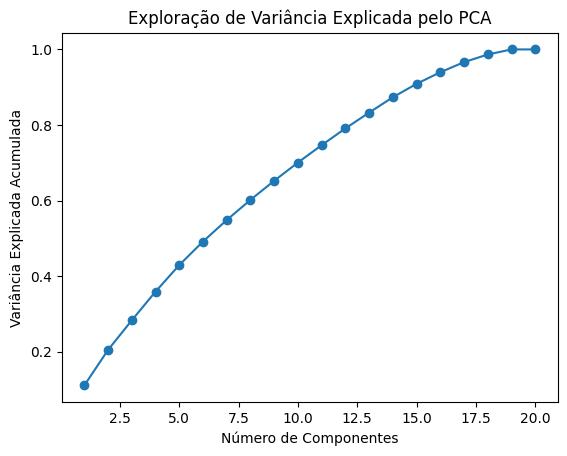

In [44]:
explained_variance_ratio = np.array([0.11050222, 0.09405302, 0.07826315, 0.0759982,
                                     0.07028684, 0.06231417, 0.05686401, 0.05343194,
                                     0.05043705, 0.04841952, 0.04586966, 0.04438015,
                                     0.04192076, 0.0406116, 0.03559539, 0.03058861,
                                     0.02678623, 0.02023744, 0.01344005, 0.0])

cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Número de componentes para 95% da variância: {n_components}")

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Exploração de Variância Explicada pelo PCA')
plt.show()


In [ ]:
components = np.arange(1, len(cumulative_variance) + 1)

df = pd.DataFrame({'Components': components,
'Cumulative Explained Variance': cumulative_variance,
'Explained Variance': explained_variance_ratio})

chart = alt.Chart(df).mark_circle(opacity=0.7,size=100).encode(
    x=alt.X('Components:Q', title='Components'),
    y=alt.Y('Cumulative Explained Variance:Q', title='Cumulative Variance (%)'),
    size=alt.Size('Explained Variance:Q', title='Variance/Component (%)'),
    tooltip=[
        alt.Tooltip('Components:Q', title='Components'),
        alt.Tooltip('Cumulative Explained Variance:Q', format='.2%', title='Cumulative'),
        alt.Tooltip('Explained Variance:Q', format='.2%', title='Per Component')
    ],
    color=alt.Color('Components:O', scale=alt.Scale(range=custom_palette), title='Components')
).interactive()

line = alt.Chart(pd.DataFrame({'x': [n_components]})).mark_rule(
    color='red',
    strokeDash=[5, 5],
    size=2
).encode(
    x='x:Q',tooltip=[alt.Tooltip('x:Q', title='Ideal Components')])

final_chart = (chart + line).properties(
    width=600,height=400,
    title='Exploring PCA Explained Variance')

final_chart

In [45]:
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(doc_topic_matrix)

- metodo elbow

In [46]:
from sklearn.cluster import MiniBatchKMeans

In [47]:
sse = []  

for k in range(1, 21):  # Teste de 1 a 20 clusters
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    sse.append(kmeans.inertia_) 

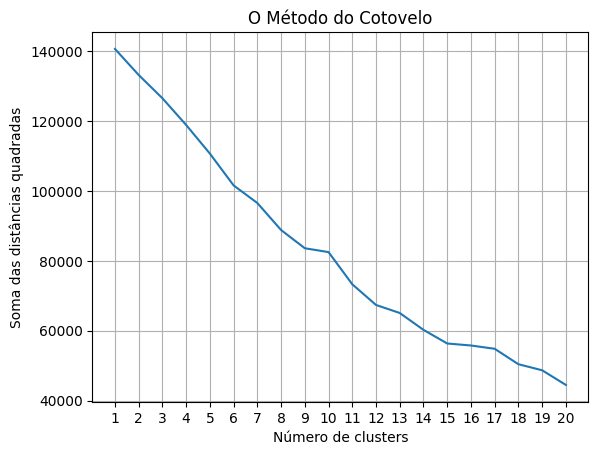

In [48]:
plt.plot(range(1, 21), sse)
plt.title('O Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Soma das distâncias quadradas')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

In [49]:
from yellowbrick.cluster import KElbowVisualizer

c:\Users\mapin\Desktop\Analise_de_dados_SIAC\.venv\lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\mapin\Desktop\Analise_de_dados_SIAC\.venv\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\mapin\Desktop\Analise_de_dados_SIAC\.venv\lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\mapin\Desktop\Analise_de_dados_SIAC\.venv\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


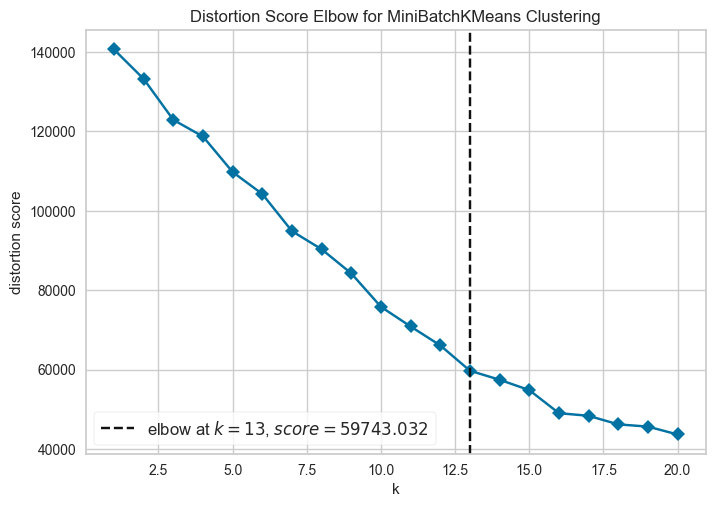

<Axes: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
model = MiniBatchKMeans()
visualizer = KElbowVisualizer(model, k=(1,21), timings = False)
visualizer.fit(reduced_data)
visualizer.show()

In [51]:
lines = visualizer.ax.get_lines()  
lines[0].set_color("#e84a5f")
visualizer.finalize()
#visualizer.ax.figure.savefig("mineração_texto/elbow_method.svg", format="svg")

Avaliação da Qualidade de Clusters com Silhouette Score

In [52]:
from sklearn.metrics import silhouette_score

for k in range(2, 21):  
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    
    score = silhouette_score(reduced_data, kmeans.labels_)
    
    print("Para o cluster: {}, a pontuação da silhueta é: {:.3f}".format(k, score))
 

Para o cluster: 2, a pontuação da silhueta é: 0.030


KeyboardInterrupt: 

In [53]:
silhouette_coefficients = []
for k in range(2, 21):  # A pontuação da silhueta começa em 2 clusters
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    
    score = silhouette_score(reduced_data, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), silhouette_coefficients, marker='o', linestyle='-', color='b')
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Coefficient", fontsize=12)
plt.title("Silhouette Analysis for Different Numbers of Clusters", fontsize=14)
plt.grid(alpha=0.5)
plt.show()


KeyboardInterrupt: 

* Transformando os dados para um espaço bidimensional, que pode ser utilizado para visualizações adicionais.

In [54]:
from sklearn.manifold import TSNE

relatos_embedded = TSNE(n_components=2, verbose=1, perplexity=40, early_exaggeration=20).fit_transform(doc_topic_matrix)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 429478 samples in 0.019s...
[t-SNE] Computed neighbors for 429478 samples in 415.269s...
[t-SNE] Computed conditional probabilities for sample 1000 / 429478
[t-SNE] Computed conditional probabilities for sample 2000 / 429478
[t-SNE] Computed conditional probabilities for sample 3000 / 429478
[t-SNE] Computed conditional probabilities for sample 4000 / 429478
[t-SNE] Computed conditional probabilities for sample 5000 / 429478
[t-SNE] Computed conditional probabilities for sample 6000 / 429478
[t-SNE] Computed conditional probabilities for sample 7000 / 429478
[t-SNE] Computed conditional probabilities for sample 8000 / 429478
[t-SNE] Computed conditional probabilities for sample 9000 / 429478
[t-SNE] Computed conditional probabilities for sample 10000 / 429478
[t-SNE] Computed conditional probabilities for sample 11000 / 429478
[t-SNE] Computed conditional probabilities for sample 12000 / 429478
[t-SNE] Computed conditional prob

KeyboardInterrupt: 

In [ ]:
import altair as alt

relatos = relatos.assign(tsne1 = relatos_embedded[:,0], tsne2 = relatos_embedded[:,1])
width = 600
height = 400
alt.Chart(relatos.sample(500)).mark_circle(
    opacity = .7,
    size = 30
).encode(
    x = 'tsne1',
    y = 'tsne2', 
    color=alt.Color('main_topic:N', title='Topic'),
    size=alt.Size('main_topic_prob', title='Probability of topic'),
    tooltip = ['relato', 'main_topic', 'main_topic_prob']
).interactive().properties(
    width=width,
    height=height
)


 Utilização do algoritmo MiniBatchKMeans para realizar clustering nos dados de tópicos obtidos a partir da matriz dos relatos transformados.
 * Agrupamento de acordo com os topicos

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=15,init_size=1024, batch_size=2048, random_state=42)
#fit the data 
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

In [ ]:
relatos1 = relato_topico.assign(grupo = labels, 
                              tsne1 = relatos_embedded[:,0], tsne2 = relatos_embedded[:,1])
width = 700
height = 500
alt.Chart(relatos1.sample(500)).mark_circle(
    opacity = .7,
    size = 50
).encode(
    x = 'tsne1',
    y = 'tsne2', 
    color=alt.Color('grupo:N', title='Group', scale=alt.Scale(domain=ordered_groups, range=custom_palette)),
    tooltip = [str(c) for c in relatos1.columns]
).interactive().properties(
    width=width,
    height=height
)



# Implementação do modelo Word2vec

In [102]:
# 2. Converter string de tokens para listas reais
relatos_processados['tokens'] = relatos_processados['tokens'].apply(eval)

# 3. Construir corpus
corpus = relatos_processados['tokens'].tolist()

In [ ]:
import spacy
import gensim 
import numpy as np
from gensim.models import Word2Vec


In [ ]:
modelo_w2v = Word2Vec(
    sentences=corpus,
    vector_size=10000,       # Dimensão dos vetores
    window=50,              # Janela de contexto
    min_count=50000,          # Palavras com pelo menos 10 ocorrências
    workers=4,             # Núcleos paralelos
    sg=2,                  # 1=skip-gram, 0=CBOW
    seed=42
)

In [ ]:
from sklearn.cluster import KMeans

word_vectors = modelo_w2v.wv.vectors
vocab = modelo_w2v.wv.index_to_key

# Número de clusters (tópicos)
n_clusters = 20

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(word_vectors)
labels = kmeans.labels_

df_clusters = pd.DataFrame({'word': vocab, 'cluster': labels})

top_words_per_cluster = {}

for i in range(n_clusters):
    cluster_words = df_clusters[df_clusters['cluster'] == i]['word'].tolist()
    vectors = [modelo_w2v.wv[word] for word in cluster_words]
    center = kmeans.cluster_centers_[i]
    
    # Calcula distâncias ao centro
    distances = [np.linalg.norm(vec - center) for vec in vectors]
    sorted_words = sorted(zip(cluster_words, distances), key=lambda x: x[1])
    
    top_words_per_cluster[i] = [word for word, _ in sorted_words[:10]]

for cluster_id, words in top_words_per_cluster.items():
    print(f"\n Cluster {cluster_id}: {', '.join(words)}")


 Cluster 0: chegar, dar, tentar, dois, encontrar, residencia, agredir, companheiro, apresentar, fisicamente

 Cluster 1: dizer, ameacar, ameaco, matar, mandar, mensagem

 Cluster 2: fazer, ainda, passar, todo, motivo, chamar, poder, vir, saber, direito

 Cluster 3: relacionamento, mês, separar, aceitar

 Cluster 4: ofender, agressor

 Cluster 5: providencia

 Cluster 6: residente

 Cluster 7: mae, pequeno

 Cluster 8: criminalmente

 Cluster 9: deixar, sair, querer, casa, pedir, ficar, levar, pegar, filho, embora

 Cluster 10: contra, ameaçar, medida

 Cluster 11: representar

 Cluster 12: vizinho

 Cluster 13: contato

 Cluster 14: ocorrer, relatar, unidade, ter, informar, identificar, senhor, esposo, crime

 Cluster 15: possuir, telefone, especializar

 Cluster 16: seguir

 Cluster 17: marido

 Cluster 18: devir

 Cluster 19: protetivo


In [ ]:
from sklearn.cluster import KMeans

word_vectors = modelo_w2v.wv
vocab = list(word_vectors.index_to_key)
X = word_vectors[vocab]

n_clusters = 20  
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X)


,n_clusters,20
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [ ]:
from collections import defaultdict

cluster_words = defaultdict(list)
for word, label in zip(words, labels):
    cluster_words[label].append(word)


In [116]:
for i in range(n_clusters):
    cluster_indices = np.argsort(
        np.linalg.norm(X - kmeans.cluster_centers_[i], axis=1)
    )[:10]
    words = [vocab[idx] for idx in cluster_indices]
    print(f"Tópico {i + 1}: {words}")


Tópico 1: ['chegar', 'dar', 'tentar', 'dois', 'ainda', 'encontrar', 'fazer', 'residencia', 'relatar', 'motivo']
Tópico 2: ['dizer', 'ameacar', 'ameaco', 'matar', 'mandar', 'fazer', 'ainda', 'todo', 'querer', 'passar']
Tópico 3: ['fazer', 'ainda', 'passar', 'dar', 'todo', 'motivo', 'chamar', 'dizer', 'chegar', 'poder']
Tópico 4: ['relacionamento', 'mês', 'separar', 'aceitar', 'possuir', 'filho', 'dois', 'casal', 'querer', 'companheiro']
Tópico 5: ['agressor', 'ofender', 'medida', 'contra', 'residencia', 'aceitar', 'protetivo', 'casal', 'ameaçar', 'possuir']
Tópico 6: ['providencia', 'ocorrer', 'informar', 'mae', 'direito', 'relatar', 'ameacar', 'fazer', 'todo', 'unidade']
Tópico 7: ['residente', 'possuir', 'filho', 'telefone', 'companheiro', 'relatar', 'residir', 'motivo', 'dois', 'relacionamento']
Tópico 8: ['mae', 'pequeno', 'ocorrer', 'deixar', 'levar', 'ainda', 'passar', 'filha', 'dois', 'todo']
Tópico 9: ['criminalmente', 'ameaçar', 'motivo', 'medida', 'contra', 'matar', 'ainda', '

In [ ]:
import pandas as pd
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

amostra = relatos_processados.sample(n=20000, random_state=42)

dictionary = Dictionary(amostra['tokens'])
corpus = [dictionary.doc2bow(text) for text in amostra['tokens']]

topics_w2v = list(top_words_per_cluster.values())

coherence_cv = CoherenceModel(
    topics=topics_w2v,
    texts=amostra['tokens'],
    dictionary=dictionary,
    coherence='c_v',
    processes=1  # evita MemoryError
).get_coherence()

coherence_npmi = CoherenceModel(
    topics=topics_w2v,
    texts=amostra['tokens'],
    dictionary=dictionary,
    coherence='c_npmi',
    processes=1
).get_coherence()

print(f"Coerência C_V (Word2Vec): {coherence_cv:.4f}")
print(f"Coerência NPMI (Word2Vec): {coherence_npmi:.4f}")


 Coerência C_V (Word2Vec): 0.8156
Coerência NPMI (Word2Vec): nan


c:\Users\mapin\Desktop\Analise_de_dados_SIAC\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mapin\Desktop\Analise_de_dados_SIAC\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [120]:
from collections import Counter
todas_palavras = [palavra for texto in amostra['tokens'] for palavra in texto]
contagem = Counter(todas_palavras)

for i, palavras in top_words_per_cluster.items():
    print(f"Cluster {i}: {[contagem[p] for p in palavras]}")


Cluster 0: [7430, 3573, 3930, 4525, 3758, 6496, 7133, 6931, 2918, 2770]
Cluster 1: [7295, 6251, 2988, 2832, 2953, 3448]
Cluster 2: [7360, 4680, 6651, 4297, 2407, 4064, 2811, 3871, 4049, 3329]
Cluster 3: [4697, 3550, 2775, 2800]
Cluster 4: [3687, 3306]
Cluster 5: [3439]
Cluster 6: [4571]
Cluster 7: [5152, 3638]
Cluster 8: [3079]
Cluster 9: [3190, 6381, 4911, 20733, 4670, 3486, 2665, 4308, 13425, 2427]
Cluster 10: [6539, 2680, 6545]
Cluster 11: [3185]
Cluster 12: [2250]
Cluster 13: [5417]
Cluster 14: [5715, 2571, 4288, 3456, 2427, 2294, 2844, 2667, 4126]
Cluster 15: [3130, 2282, 3266]
Cluster 16: [2430]
Cluster 17: [2963]
Cluster 18: [4448]
Cluster 19: [5980]


In [121]:
model_uci = CoherenceModel(
    topics=topics_w2v,
    texts=amostra['tokens'],
    dictionary=dictionary,
    coherence='c_uci',
    processes=1
).get_coherence()
print(f"C_UCI: {model_uci:.4f}")


C_UCI: nan


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px

words = []
labels = []
for cluster_id, palavras in top_words_per_cluster.items():
    for palavra in palavras:
        words.append(palavra)
        labels.append(cluster_id)

word_vectors = [modelo_w2v.wv[word] for word in words]

X_pca = PCA(n_components=2).fit_transform(word_vectors)

df_plot = pd.DataFrame({
    'x': X_pca[:, 0],
    'y': X_pca[:, 1],
    'Cluster': labels,
    'Palavra': words
})

fig = px.scatter(
    df_plot,
    x='x',
    y='y',
    color='Cluster',
    text='Palavra',
    hover_data=['Palavra', 'Cluster'],
    title='Clusters de Palavras (Word2Vec + KMeans)',
    template='plotly_white',
     width=600,
    height=400
)
fig.update_traces(marker=dict(size=10, opacity=0.7))  # pontos maiores e translúcidos
fig.update_layout(
    showlegend=True,
    margin=dict(l=40, r=40, t=60, b=40),
    font=dict(size=14)
)
fig.show()
# fig.write_image("clusters_word2vec_kmeans.svg")  # se quiser salvar


- Validacao do modelo

Inertia (Soma das distâncias aos centroides)


In [131]:
print(f"Inertia: {kmeans.inertia_}")

Inertia: 65.70690155029297


Silhouette Score (Separação dos Clusters)

In [132]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette:.4f}")


Silhouette Score: 0.0416


🔹 Avaliação da Coerência (NPMI ou C_V)

In [ ]:
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

texts_tokens = relatos['tokens'].tolist()
dictionary = Dictionary(texts_tokens)

w2v_topics = []
for i in range(n_clusters):
    cluster_indices = np.argsort(
        np.linalg.norm(X - kmeans.cluster_centers_[i], axis=1)
    )[:10]
    words = [vocab[idx] for idx in cluster_indices]
    w2v_topics.append(words)

# Avaliar coerência
cm = CoherenceModel(
    topics=w2v_topics,
    texts=texts_tokens,
    dictionary=dictionary,
    coherence='c_npmi'  # ou 'c_v', 'u_mass'
)

coherence = cm.get_coherence()
print(f"Coerência Word2Vec (NPMI): {coherence:.4f}")


Análise das Distribuições dos Tópicos

In [ ]:
from collections import Counter

counts = Counter(kmeans.labels_)
for cluster_id in range(n_clusters):
    print(f"Tópico {cluster_id + 1}: {counts[cluster_id]} palavras")


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Redução para 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_, cmap='tab10')
plt.title("Clusters de Word2Vec via KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


In [ ]:
# Verifica o tipo do primeiro elemento da coluna 'tokens'
primeiro_elemento = relatos_processados['tokens'].iloc[0]
print(f"Tipo do primeiro elemento: {type(primeiro_elemento)}")
print(f"Conteúdo: {primeiro_elemento}")

Tipo do primeiro elemento: <class 'str'>
Conteúdo: ['marisangela', 'ferreira', 'pacheco', 'uipp', 'terra', 'firme', 'citar', 'trabalhar', 'esposo', 'funcinário', 'trabalhar', 'chamar', 'nezia', 'gome', 'fazer', 'escândalo', 'loja', 'trabalhar', 'dizer', 'pegar', 'cortar', 'todo', 'cara', 'desa', 'putar', 'deixar', 'arrear', 'chão', 'furar', 'todinha', 'dizer', 'nezia', 'espalha', 'caso', 'marido', 'levy', 'baia', 'trabalhar', 'sente', 'constrangir', 'fofoca', 'ameaça', 'pedir', 'levy', 'convencer', 'esposo', 'dois', 'relação', 'rapaz', 'fazer', 'nada', 'calar', 'saber', 'suspeito', 'residir', 'simão', 'jatene', 'água', 'cristal', 'trabalhar', 'francisco', 'xavier', 'final', 'jabatiteua', 'padario', 'esquina', 'próximo', 'vileta']


Agrupamento com KMeans

In [ ]:
from collections import Counter

cluster_words = {}

for cluster_num in range(num_clusters):
    cluster_docs = [doc for doc, c in zip(relatos_processados['tokens'], labels) if c == cluster_num]
    
    all_words = [word for doc in cluster_docs for word in doc if word in modelo_w2v.wv]
    
    word_counts = Counter(all_words)
    top_words = [word for word, count in word_counts.most_common(10)]  # Top 10 palavras
    
    cluster_words[cluster_num] = top_words

print("\nPalavras mais representativas por cluster:")
for cluster, words in cluster_words.items():
    print(f"Cluster {cluster}: {', '.join(words)}")


Palavras mais representativas por cluster:
Cluster 0: mandar, prisao, cumprimento, registrar, apresentar, dar, auto, desfavor, expeder, preventivo
Cluster 1: registrar, motocicleta, placo, cor, placar, chassi, acidente, honda, modelo, moto
Cluster 2: casa, registrar, filho, filha, chegar, residencia, dizer, fazer, sair, passar
Cluster 3: acidente, transito, envolver, condutor, legal, providencia, direito, cor, modelo, chassi
Cluster 4: encontrar, apresentar, registrar, conduzir, individuo, identificar, fazer, realizar, motocicleta, diante
Cluster 5: banco, registrar, contar, real, pix, fazer, receber, realizar, cartao, conta
Cluster 6: registrar, residencia, casa, localizar, furtar, unidade, furto, ocorrer, devir, empresa
Cluster 7: casa, filho, medida, protetivo, registrar, ofender, companheiro, relacionamento, contato, contra
Cluster 8: cartao, registrar, carteiro, identidade, banco, documento, bolsa, conter, furtar, carteira
Cluster 9: cor, registrar, preto, imei, dois, marca, sams

Visualização com WordCloud por cluster

Projeção com PCA para visualização dos clusters

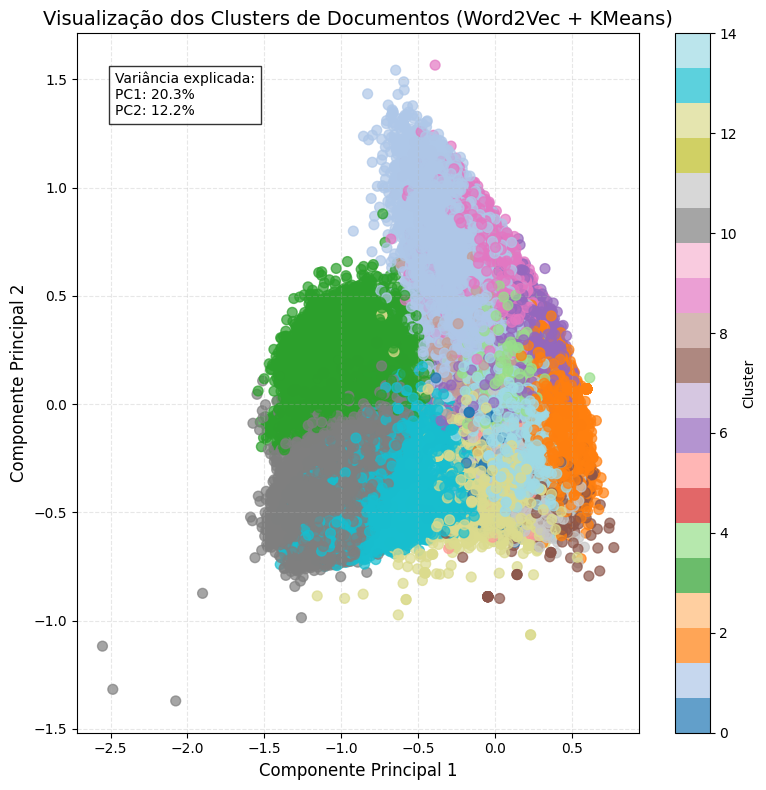

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(doc_vectors)

plt.figure(figsize=(8, 8))
scatter = plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=labels,            
    cmap='tab20', 
    s=50, 
    alpha=0.7
)

plt.title('Visualização dos Clusters de Documentos (Word2Vec + KMeans)', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)

var_exp = pca.explained_variance_ratio_
plt.figtext(0.15, 0.85, f"Variância explicada:\nPC1: {var_exp[0]:.1%}\nPC2: {var_exp[1]:.1%}", 
            bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
print(f"Documentos: {len(doc_vectors)}, Clusters: {len(labels)}")
print(f"Valores únicos de clusters: {np.unique(labels)}")

Documentos: 563862, Clusters: 563862
Valores únicos de clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


- Avaliação de clusters

In [49]:
from sklearn.metrics import silhouette_score
score = silhouette_score(doc_vectors, labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.114


- Visualização 3d

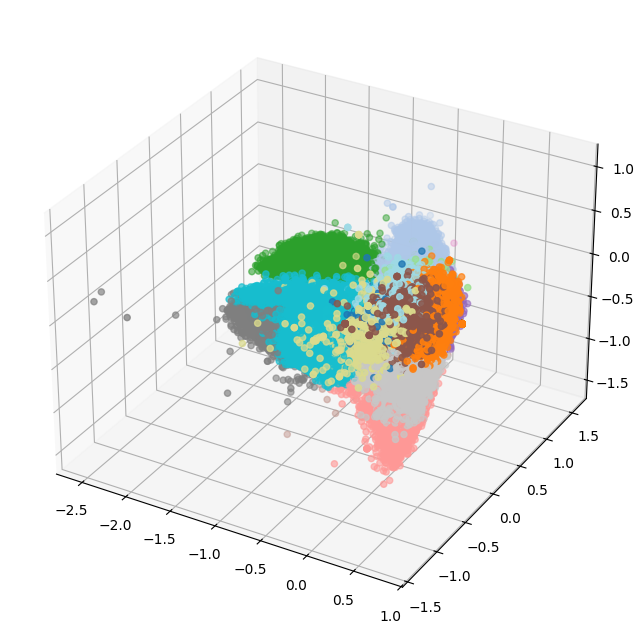

In [51]:
from mpl_toolkits.mplot3d import Axes3D

pca3d = PCA(n_components=3)
X_pca3d = pca3d.fit_transform(doc_vectors)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3d[:,0], X_pca3d[:,1], X_pca3d[:,2], c=labels, cmap='tab20')
plt.show()

- Analise por cluster

In [52]:
relatos_processados['cluster'] = labels
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(relatos_processados[relatos_processados['cluster'] == cluster]['texto_limpo'].head(3))


Cluster 0:
2874    na data de hoje a autoridade policial tomou co...
2879    na data de hoje a autoridade policial tomou co...
4562    que é investigador de polícia lotado na seccio...
Name: texto_limpo, dtype: object

Cluster 1:
110    a comunicante acima vem a esta depol para rela...
214    a sra carmem dolores lara costa comunica nesta...
288    a relatora compareceu informando encontrar se ...
Name: texto_limpo, dtype: object

Cluster 2:
0    a nacional marisangela ferreira pacheco compar...
1    o relatora acima qualificada compareceu a esta...
4    a relatora qualificada em epígrafe compareceu ...
Name: texto_limpo, dtype: object

Cluster 3:
35970    o relator acima qualificado comunica atraves d...
47680    o relator acima qualificado comunica atraves d...
47707    o relator acima qualificado comunica atraves d...
Name: texto_limpo, dtype: object

Cluster 4:
642     a relatora vem a esta seccional comunicar que ...
1961    o relator acima identificado na qualidade de g...
2654 

- iterativa

In [ ]:
import altair as alt


pca = PCA(n_components=2)
X_pca = pca.fit_transform(doc_vectors)

df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': labels.astype(str),
    'Texto': relatos_processados['texto_limpo'].str[:50] + '...'  # Pré-visualização do texto
})

custom_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5'
]

scatter = alt.Chart(df).mark_circle(size=60, opacity=0.7).encode(
    x=alt.X('PC1:Q', title='Primeiro Componente Principal'),
    y=alt.Y('PC2:Q', title='Segundo Componente Principal'),
    color=alt.Color('Cluster:N', scale=alt.Scale(range=custom_palette)),
    tooltip=[
        alt.Tooltip('Cluster:N', title='Cluster'),
        alt.Tooltip('Texto:N', title='Pré-visualização')
    ]
).properties(
    width=800,
    height=500,
    title='Visualização de Clusters (Word2Vec + KMeans)'
).interactive()

centroids_df = pd.DataFrame({
    'PC1': pca.transform(kmeans.cluster_centers_)[:, 0],
    'PC2': pca.transform(kmeans.cluster_centers_)[:, 1],
    'Cluster': np.unique(labels).astype(str)
})

centroids = alt.Chart(centroids_df).mark_point(
    shape='diamond',
    size=200,
    filled=True,
    color='black'
).encode(
    x='PC1:Q',
    y='PC2:Q',
    tooltip=['Cluster:N']
)

final_chart = (scatter + centroids).configure_view(
    strokeWidth=0
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)

# 7. Salvar como SVG
#final_chart.save('mineração_texto/word2vec_kmeans_interactive.svg')

final_chart

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000).

Try enabling the VegaFusion data transformer which raises this limit by pre-evaluating data
transformations in Python.
    >> import altair as alt
    >> alt.data_transformers.enable("vegafusion")

Or, see https://altair-viz.github.io/user_guide/large_datasets.html for additional information
on how to plot large datasets.

alt.LayerChart(...)

In [ ]:
frames = []
for i in range(1, 11):  # 10 iterações
    partial_kmeans = KMeans(n_clusters=num_clusters, max_iter=i, random_state=42, n_init=1)
    partial_labels = partial_kmeans.fit_predict(doc_vectors)
    
    frames.append(pd.DataFrame({
        'PC1': X_pca[:, 0],
        'PC2': X_pca[:, 1],
        'Cluster': partial_labels.astype(str),
        'Iteration': f'Iteração {i}',
        'Texto': relatos_processados['texto_limpo'].str[:50] + '...'
    }))

animation_df = pd.concat(frames)

animated_chart = alt.Chart(animation_df).mark_circle(size=60, opacity=0.7).encode(
    x='PC1:Q',
    y='PC2:Q',
    color='Cluster:N',
    tooltip=['Cluster:N', 'Texto:N']
).properties(
    width=800,
    height=500
).interactive().facet(
    column='Iteration:N'
)

animated_chart.save('kmeans_evolution.html')

# Implementação do modelo Bertopic

In [5]:
from bertopic import BERTopic
from umap import UMAP

In [6]:
docs = [" ".join(tokens) for tokens in relatos_processados["tokens"]]

#relatos_processados['tokens'] = relatos_processados['tokens'].apply(lambda x: ' '.join(x))

In [ ]:
modelo_bertopic = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    language="multilingual",
    top_n_words=10,
    verbose=True
)

topicos, probabilidades = modelo_bertopic.fit_transform(docs)

relatos_processados["topico"] = topicos

In [31]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer

# 1. Modelo de Embedding (multilingual para português)
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# 2. Redução de dimensionalidade (UMAP)
umap_model = UMAP(n_neighbors=15, n_components=5, metric="cosine", random_state=42)

# 3. Clustering (HDBSCAN)
hdbscan_model = HDBSCAN(min_cluster_size=15, metric="euclidean", prediction_data=True)

# 4. Vetorizador para c-TF-IDF (com bigrams)
vectorizer_model = CountVectorizer(ngram_range=(1, 2))

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer

# 1. Modelo de embedding (usa CPU automaticamente)
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# 2. Redução de dimensionalidade mais rápida (menos componentes, menos vizinhos)
umap_model = UMAP(
    n_neighbors=10,
    n_components=3,
    metric="cosine",
    random_state=42
)

# 3. Clustering (com menos restrições e mais rápido)
hdbscan_model = HDBSCAN(
    min_cluster_size=20,
    metric="manhattan",               # mais simples que 'euclidean' para grandes volumes
    prediction_data=True,
    gen_min_span_tree=False           

# 4. Vetorizador de palavras (TF-IDF com unigramas e bigramas)
vectorizer_model = CountVectorizer(ngram_range=(1, 2))

# 5. Inicializar o modelo BERTopic
modelo_bertopic = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    language="multilingual",          
    top_n_words=10,
    verbose=True
)

docs_amostrados = relatos_processados["texto_limpo"].dropna().sample(n=50000, random_state=42)

topicos, probabilidades = modelo_bertopic.fit_transform(docs_amostrados.tolist())

relatos_processados.loc[docs_amostrados.index, "topico"] = topicos


2025-06-24 00:04:48,958 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

2025-06-24 01:02:02,628 - BERTopic - Embedding - Completed ✓
2025-06-24 01:02:02,640 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-24 01:03:03,170 - BERTopic - Dimensionality - Completed ✓
2025-06-24 01:03:03,185 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-24 01:03:12,857 - BERTopic - Cluster - Completed ✓
2025-06-24 01:03:12,914 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-24 01:08:56,231 - BERTopic - Representation - Completed ✓


In [29]:
# Exibir os 10 principais tópicos
modelo_bertopic.get_topic_info().head(10)


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1928,-1_que_de_da_para,"[que, de, da, para, do, nbsp, com, na, em, se]",[a relatora angela pereira de souza brasileira...
1,0,40814,0_que_de_para_da,"[que, de, para, da, relatora, com, na, nbsp, s...",[que veio a essa especializada para denunciar ...
2,1,4891,1_de_no_da_que,"[de, no, da, que, acima, do, me, conforme, min...",[o relator acima qualificado comunica atraves ...
3,2,978,2_que_de_para_da,"[que, de, para, da, em, relatora, do, na, se, no]",[a relatora comparece nesta unidade policial p...
4,3,658,3_de_violencia_me_de violencia,"[de, violencia, me, de violencia, da, mulher, ...",[o relator acima qualificado comunica atraves ...
5,4,294,4_de_que_do_da,"[de, que, do, da, na, local, no, se, nbsp, hom...",[o relator acima qualificado comunica neste at...
6,5,183,5_que_cachorro_de_relatora,"[que, cachorro, de, relatora, da, para, na, an...",[a relatora acima qualificada comparece nesta ...
7,6,121,6_que_de_da sacramenta_sacramenta,"[que, de, da sacramenta, sacramenta, da, para,...",[a relatora vem a presente seccional urbana da...
8,7,43,7_nbsp_de_qual_que,"[nbsp, de, qual, que, do, pelo ciop, endereco,...",[que o apresentante fez a conducao do nacional...
9,8,40,8_que_de_para_relatora,"[que, de, para, relatora, gado, da, seu, se, p...",[a relatora compareceu a esta unidade policial...


In [25]:
modelo_bertopic.visualize_topics()

In [ ]:
print(modelo_bertopic.get_topic_info())

print("\nTop 10 palavras do Tópico 0:")
print(modelo_bertopic.get_topic(0))

    Topic  Count                               Name  \
0      -1   1928                  -1_que_de_da_para   
1       0  40814                   0_que_de_para_da   
2       1   4891                     1_de_no_da_que   
3       2    978                   2_que_de_para_da   
4       3    658     3_de_violencia_me_de violencia   
5       4    294                     4_de_que_do_da   
6       5    183         5_que_cachorro_de_relatora   
7       6    121  6_que_de_da sacramenta_sacramenta   
8       7     43                 7_nbsp_de_qual_que   
9       8     40             8_que_de_para_relatora   
10      9     26                9_que_do_relator_de   
11     10     24              10_de_que_do_relatora   

                                       Representation  \
0      [que, de, da, para, do, nbsp, com, na, em, se]   
1   [que, de, para, da, relatora, com, na, nbsp, s...   
2   [de, no, da, que, acima, do, me, conforme, min...   
3   [que, de, para, da, em, relatora, do, na, se, no]   

In [22]:
# Gráfico de hierarquia de tópicos
fig = modelo_bertopic.visualize_hierarchy()
fig.show()

# Gráfico de barras com palavras-chave
fig2 = modelo_bertopic.visualize_barchart(top_n_topics=5)
fig2.show()

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=5)
model_bertopic = BERTopic(
    language="portuguese",
    vectorizer_model=vectorizer,
    calculate_probabilities=True,
    verbose=True
)

In [ ]:
topics, probs = model_bertopic.fit_transform(docs)
relatos["topic_bertopic"] = topics

In [ ]:
model_bertopic.get_topic_info().head(10)


In [ ]:
model_bertopic.visualize_topics()


In [ ]:
# CÉLULA 7: Visualização com UMAP + frequências
model_bertopic.visualize_barchart(top_n_topics=10)
model_bertopic.visualize_documents(docs, topics=topics)

In [ ]:
# CÉLULA 8: Projeção com PCA para explicar variância dos tópicos
doc_embeds = model_bertopic.embeddings_
pca = PCA().fit(doc_embeds)
cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative)+1), cumulative, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% da variância')
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Acumulada")
plt.title("Exploração de Variância com PCA - Embeddings do BERTopic")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
topico = 0
relatos[["relato", "tokens", "topic_bertopic"]][relatos["topic_bertopic"] == topico].sample(10)